## Telecom Churn Case Study

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
from sklearn import metrics
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing data
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.shape

(99999, 226)

### Step 2: Data Preparation

Assuming that missing value means service is not used/0 minute usage/0 recharges and so on and so forth.

In [4]:
#Imputing NaN values in Dataset with 0
churn_data = churn_data.replace({np.nan : 0})

In [5]:
#Calculating average recharge amount using the first two months i.e. june, july
avg_rech_amt = pd.DataFrame((churn_data.total_rech_amt_6 + churn_data.total_rech_amt_7 + (churn_data.total_rech_data_6*churn_data.av_rech_amt_data_6) + (churn_data.total_rech_data_7*churn_data.av_rech_amt_data_7))/4)
avg_rech_amt.rename(columns={0: 'avg_rech_amt'}, inplace=True)
churn_data = pd.concat([churn_data, avg_rech_amt], axis=1)

In [6]:
#Filtering high-value customers i.e. average recharge amount greater than equal to 70th percentile of average recharge amount
churn_data1 = churn_data.loc[churn_data.avg_rech_amt >= churn_data.avg_rech_amt.quantile(.70)]

In [7]:
churn_data1.shape

(30001, 227)

In [8]:
#Creating Churn flag using the attributes of 4th month
churn_data1.loc[(churn_data1.total_ic_mou_9==0) & (churn_data1.total_og_mou_9==0) & (churn_data1.vol_2g_mb_9==0) & (churn_data1.vol_3g_mb_9==0),'Churned']=1
churn_data1.loc[pd.isna(churn_data1['Churned']),'Churned'] = 0
churn_data1.Churned=churn_data1.Churned.astype(int)

In [9]:
churn_data1.Churned.value_counts()

0    27560
1     2441
Name: Churned, dtype: int64

In [10]:
# No. of churned customers
sum(churn_data1['Churned'])

2441

In [11]:
#Checking the Churn Rate
churn = (sum(churn_data1['Churned'])/len(churn_data1['Churned'].index))*100
churn

8.136395453484884

In [12]:
#Getting list of all the attributes of churn phase i.e. having `_9` in the column name
all_col = list(churn_data1.columns)

import re

pattern = re.compile('.*_9')
matches = [x for x in all_col if pattern.match(x)]

In [13]:
list(matches)

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [14]:
#Dropping all the churn phase columns
churn_data2 = churn_data1.drop(matches,axis=1)

In [15]:
#Getting list of all the date attributes and dropping them
all_col = list(churn_data2.columns)

import re

pattern = re.compile('.*date')
matches = [x for x in all_col if pattern.match(x)]
churn_data2 = churn_data2.drop(matches,axis=1)

In [16]:
churn_data2.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt', 'Churned'],
      dtype='object', length=165)

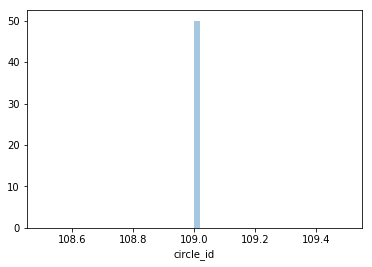

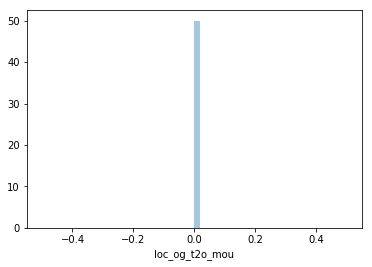

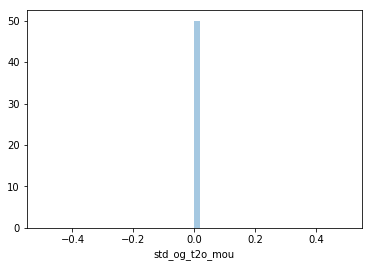

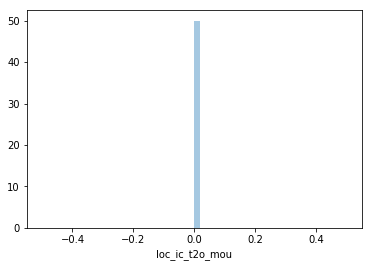

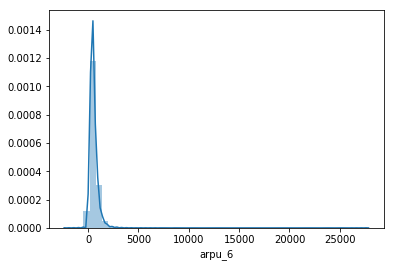

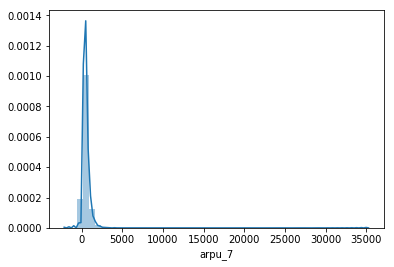

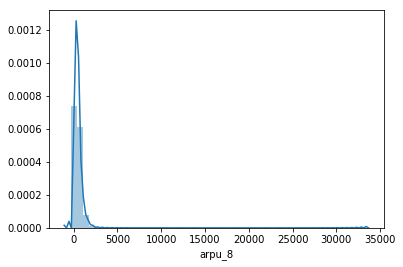

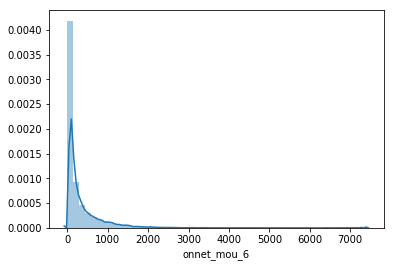

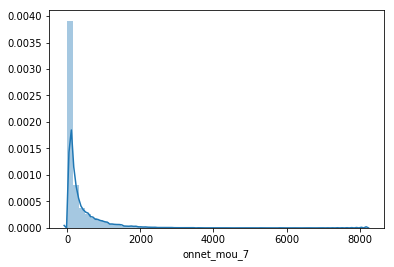

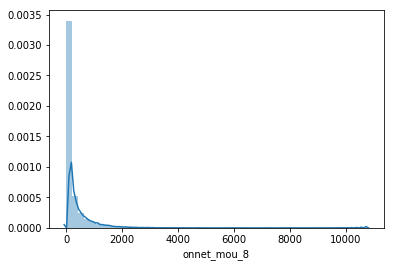

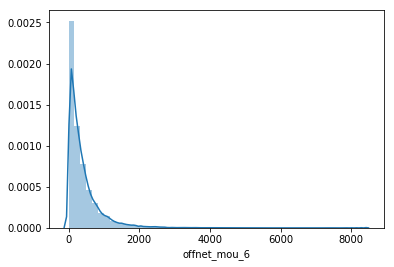

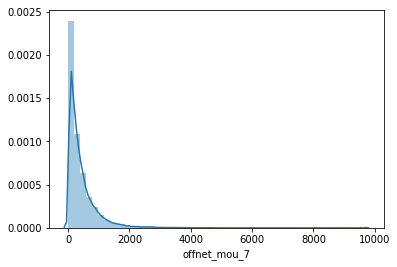

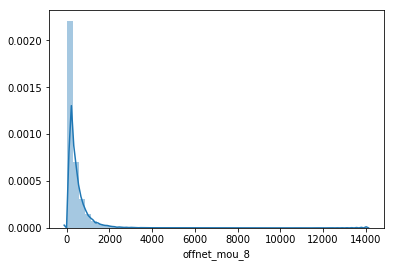

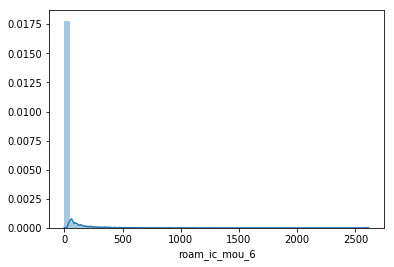

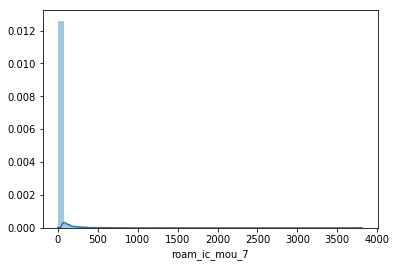

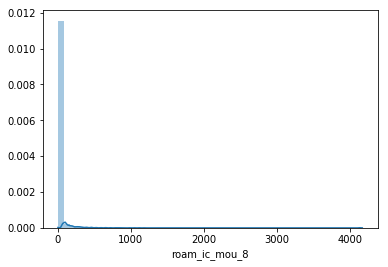

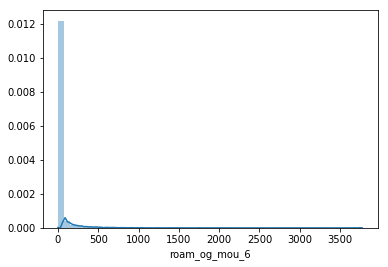

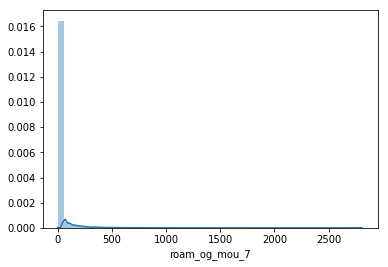

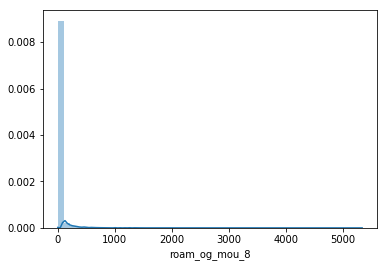

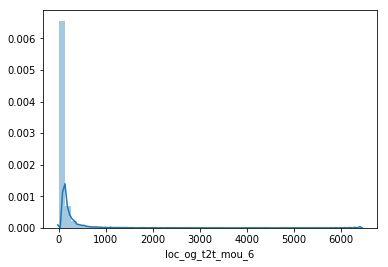

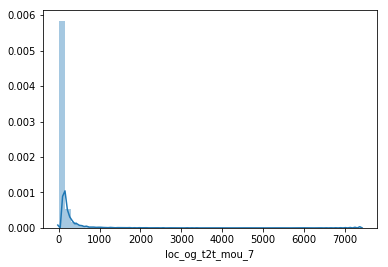

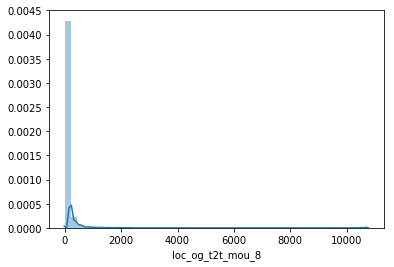

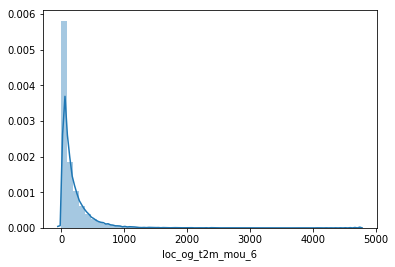

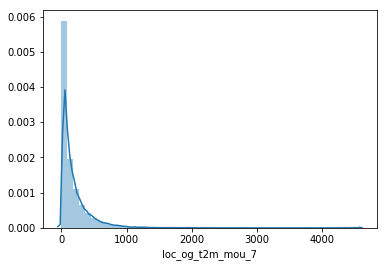

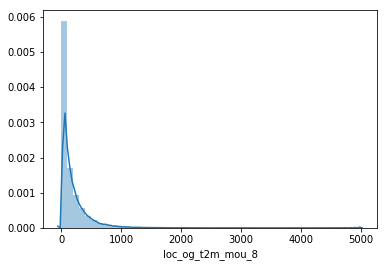

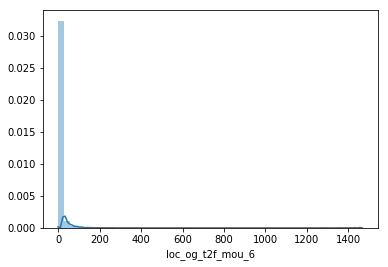

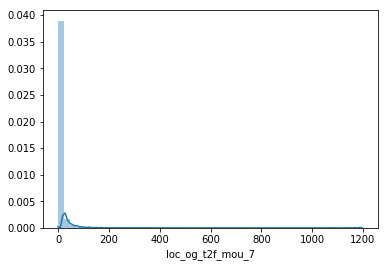

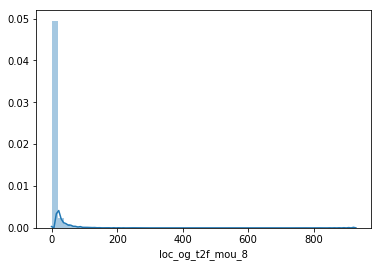

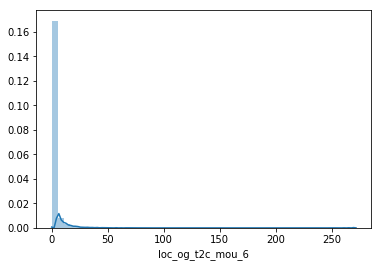

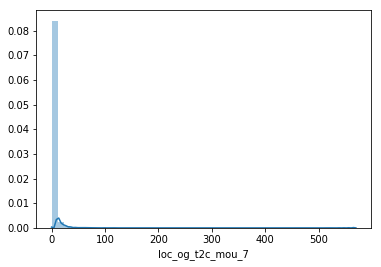

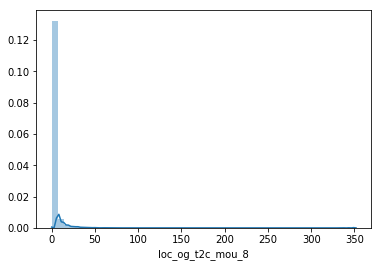

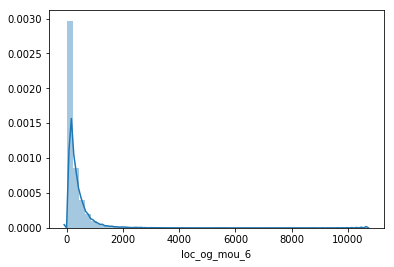

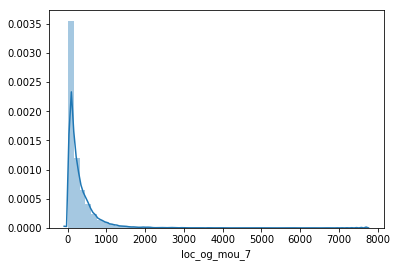

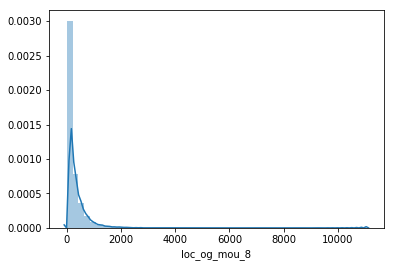

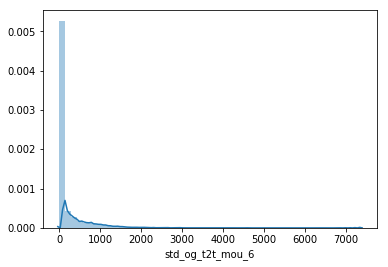

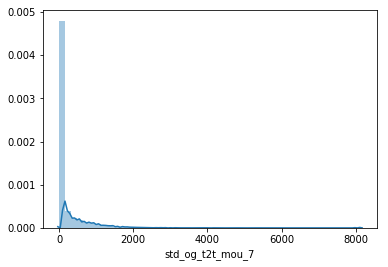

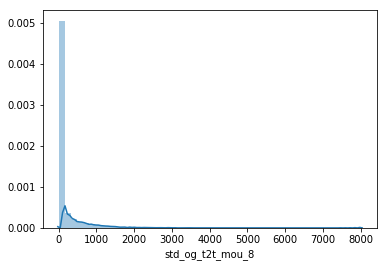

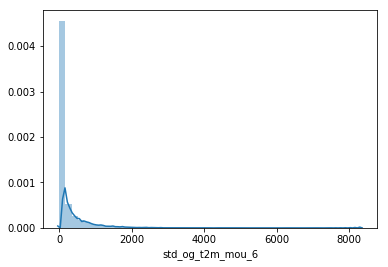

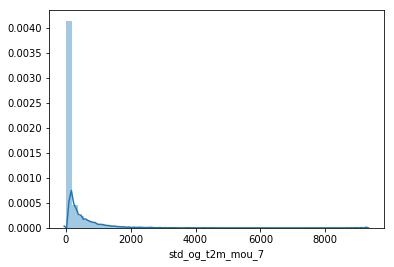

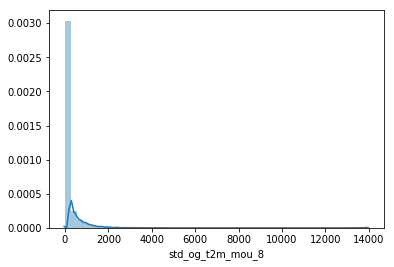

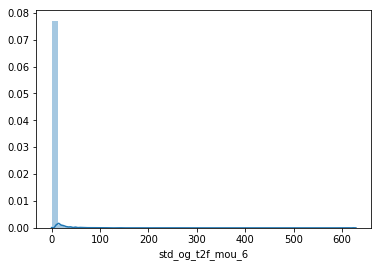

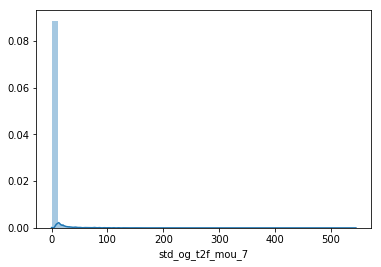

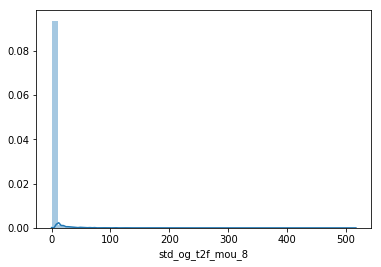

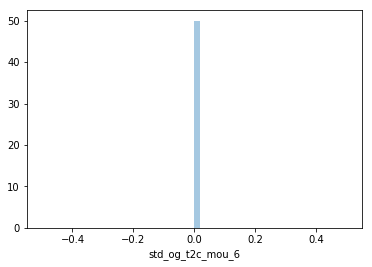

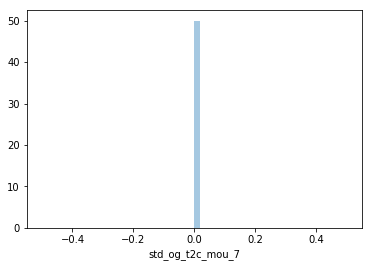

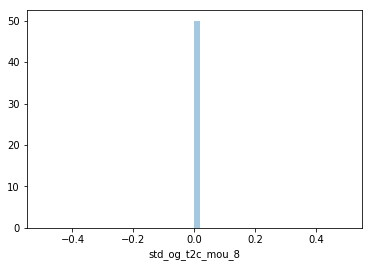

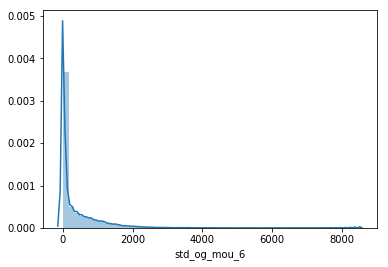

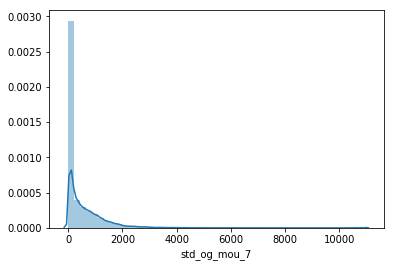

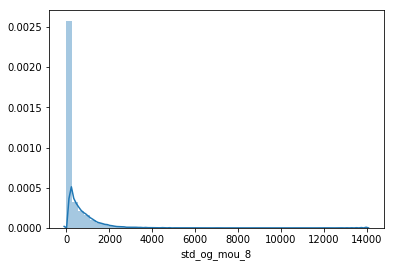

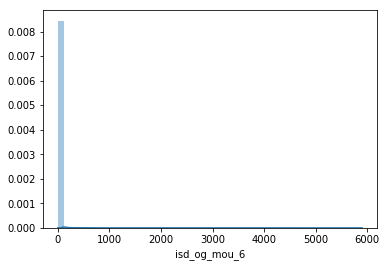

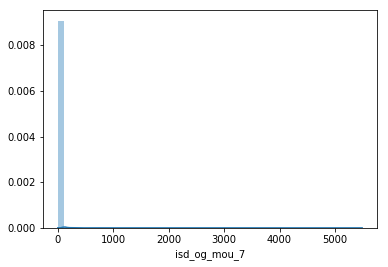

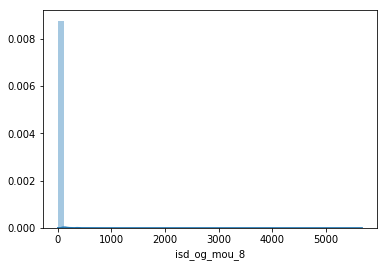

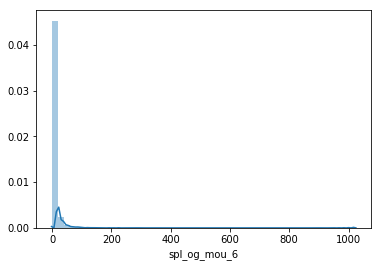

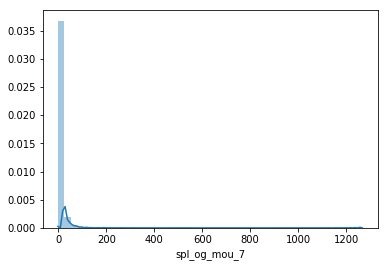

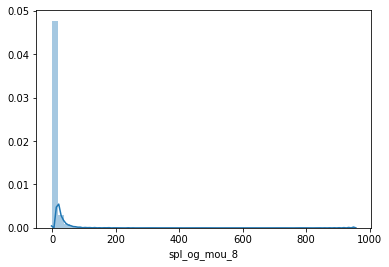

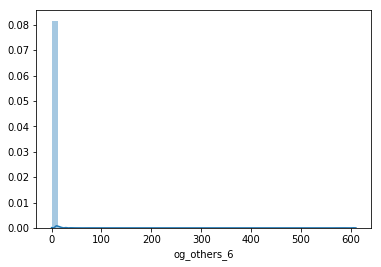

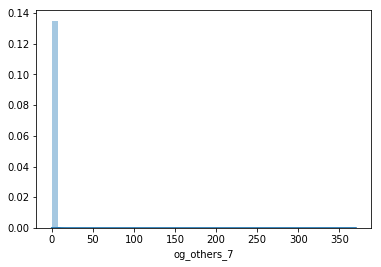

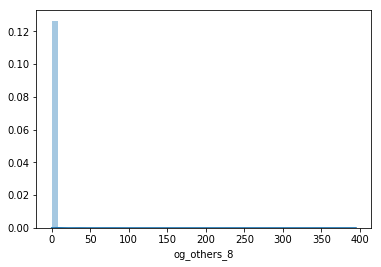

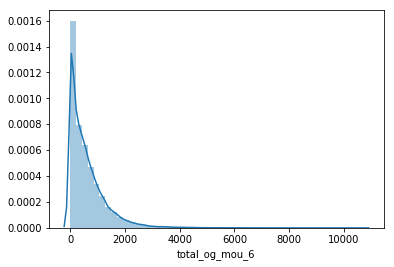

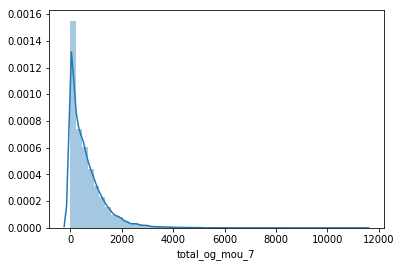

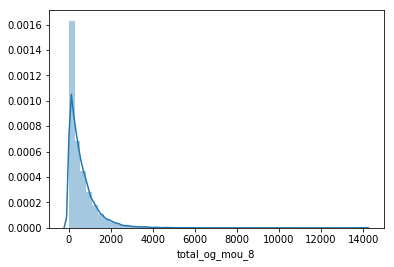

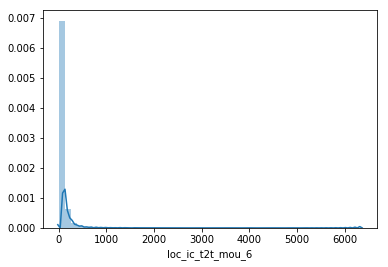

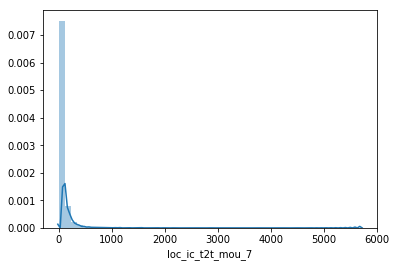

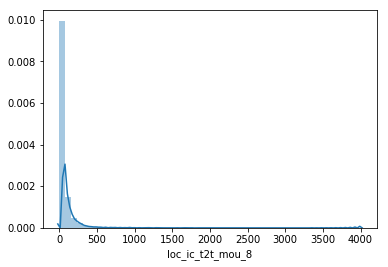

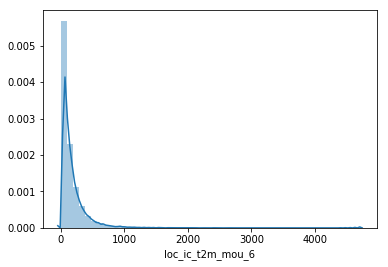

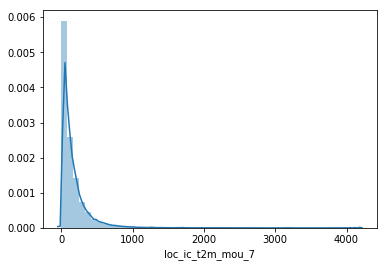

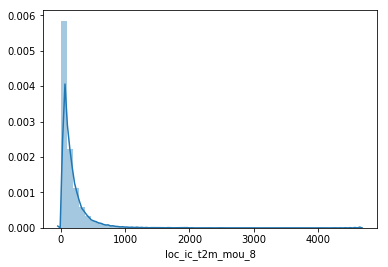

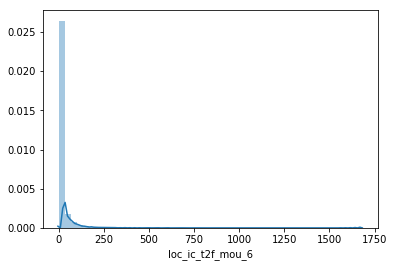

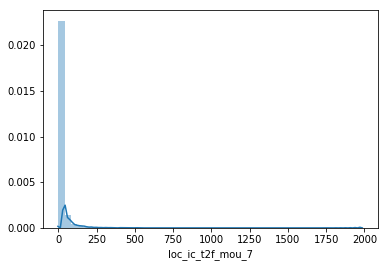

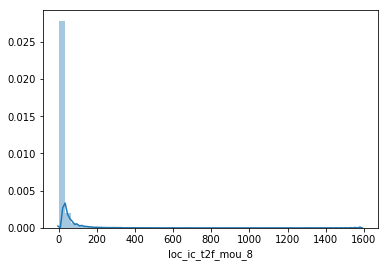

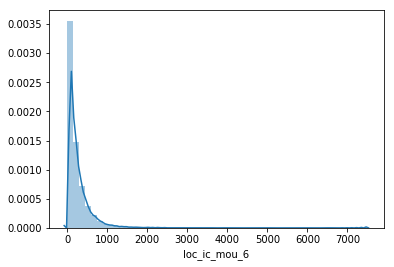

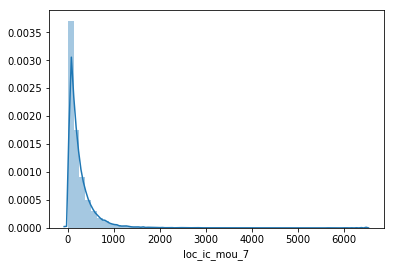

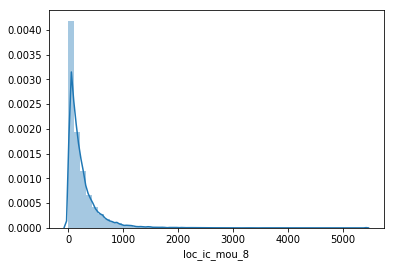

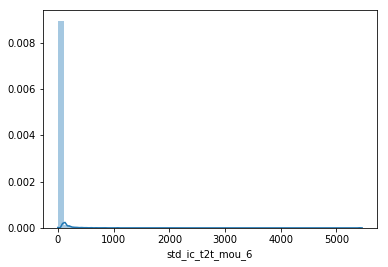

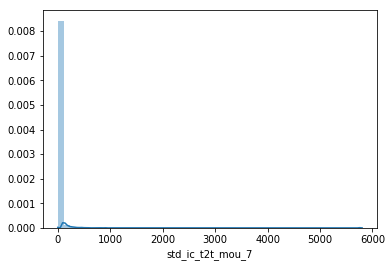

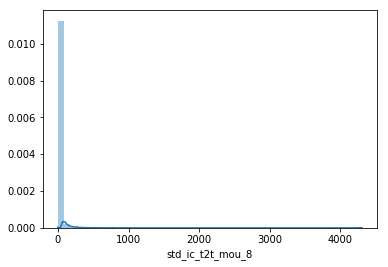

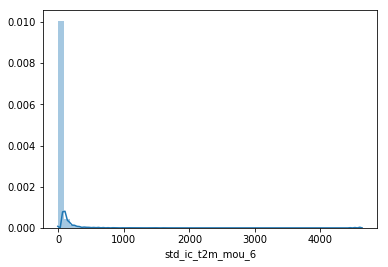

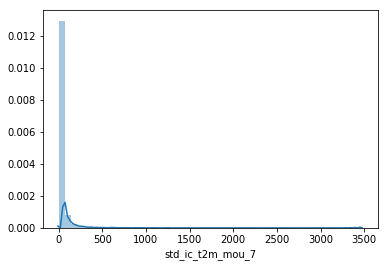

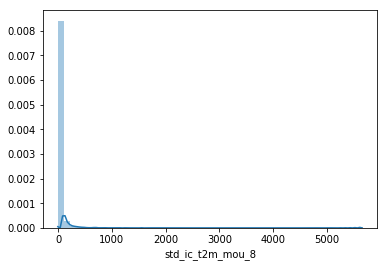

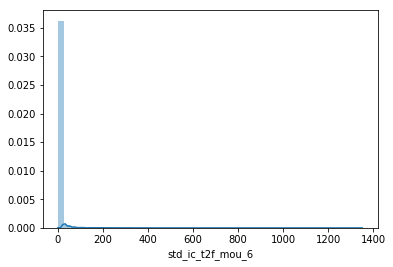

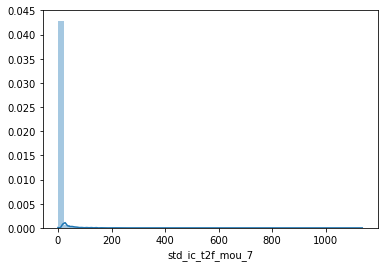

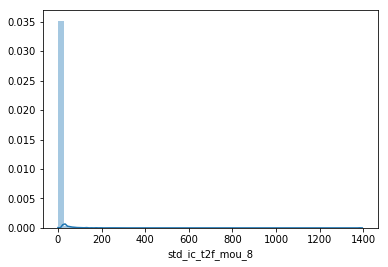

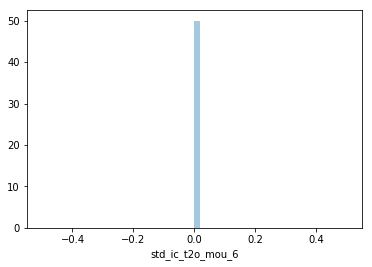

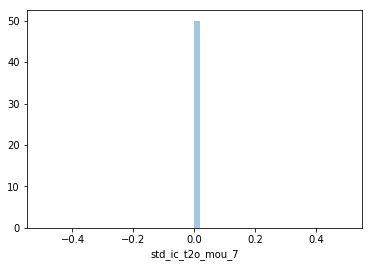

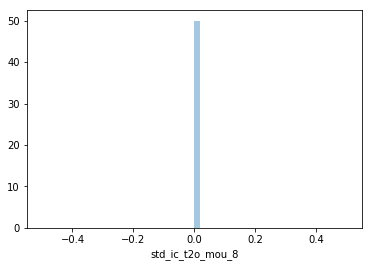

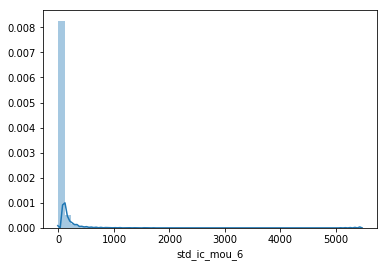

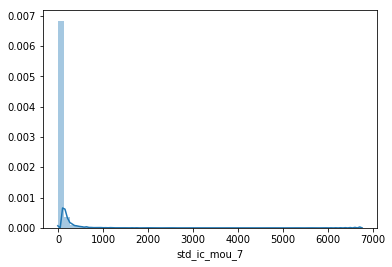

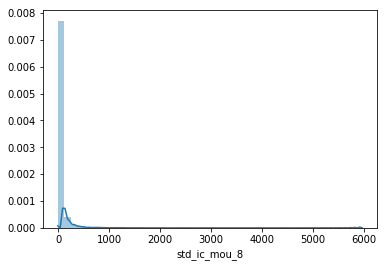

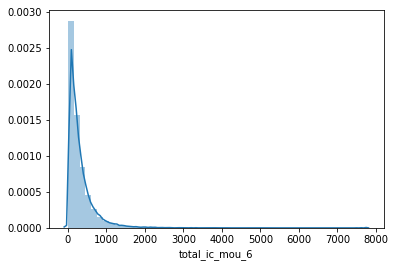

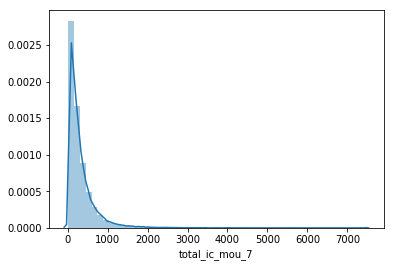

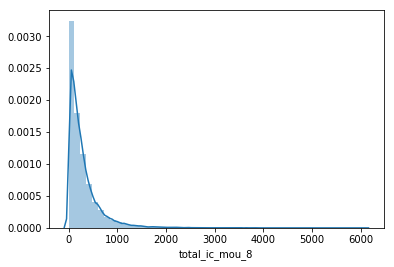

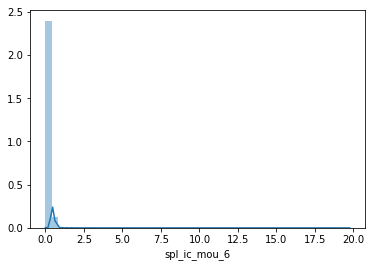

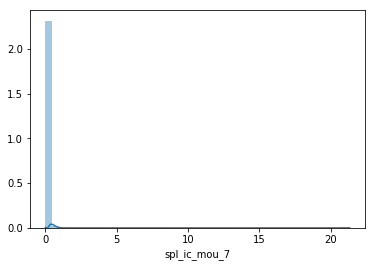

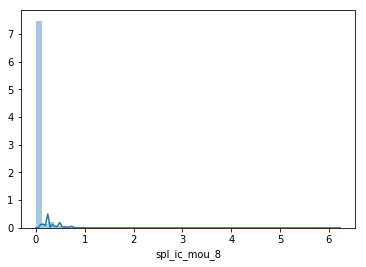

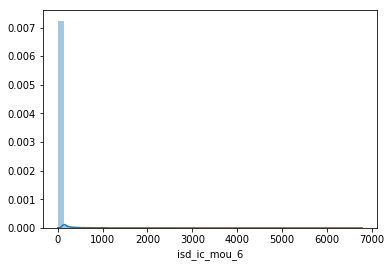

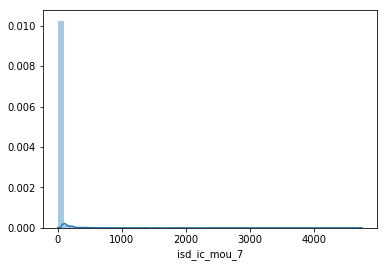

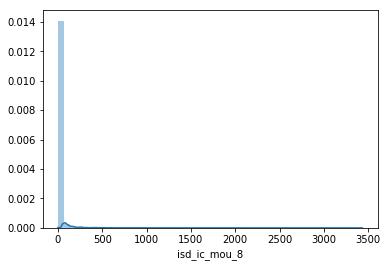

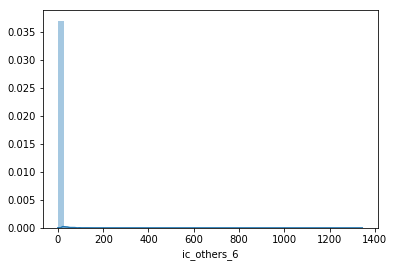

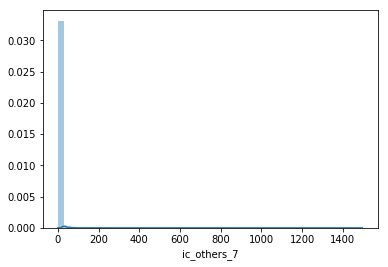

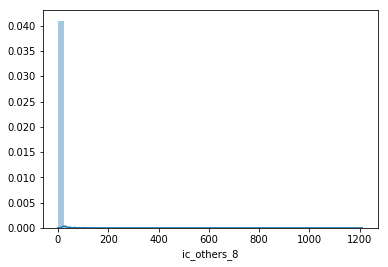

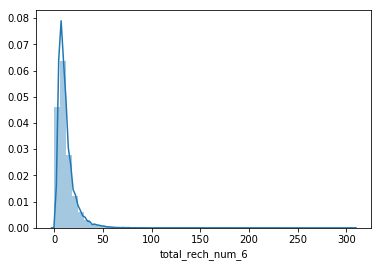

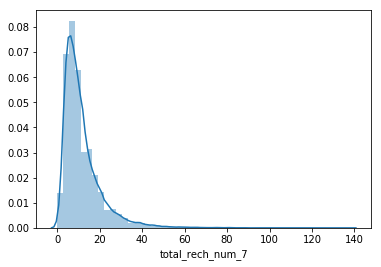

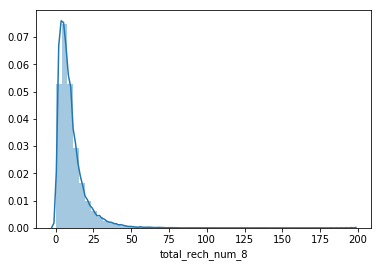

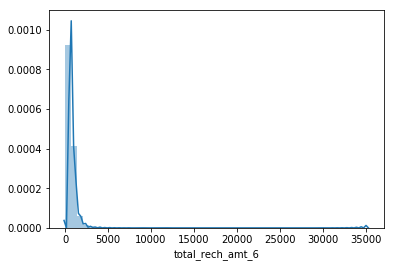

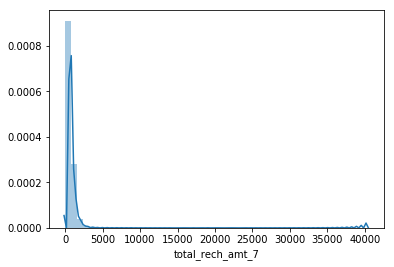

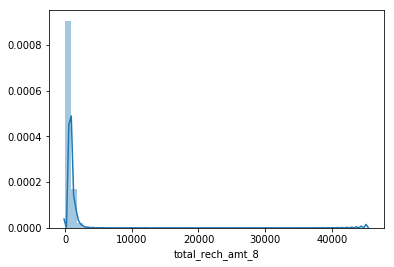

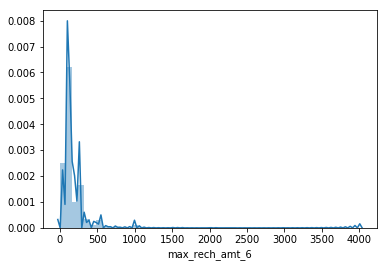

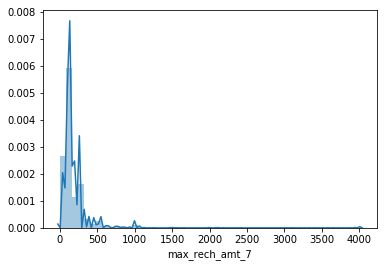

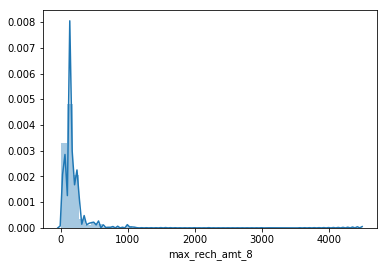

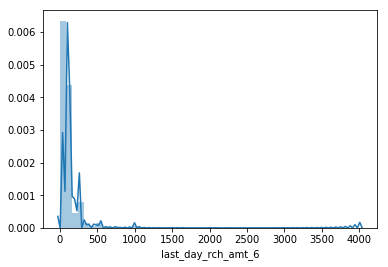

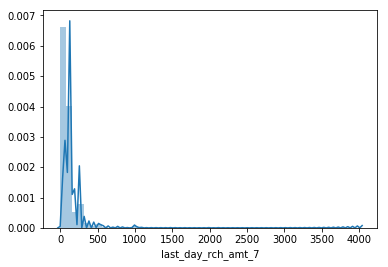

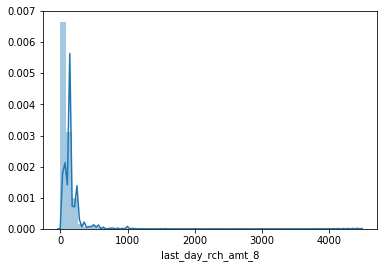

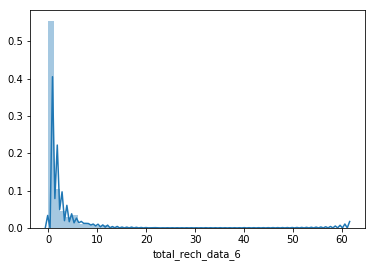

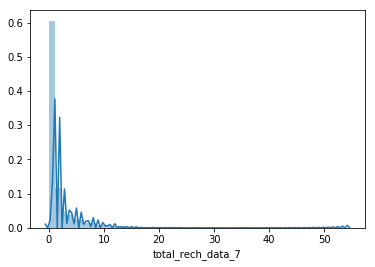

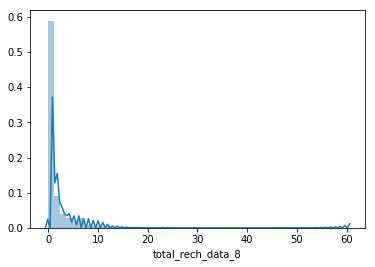

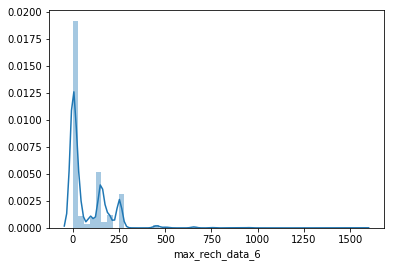

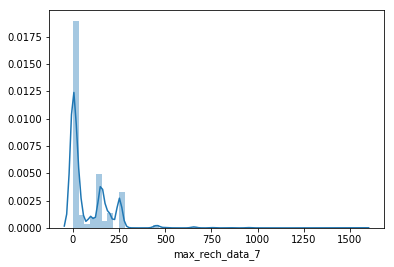

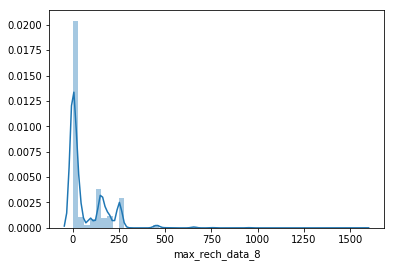

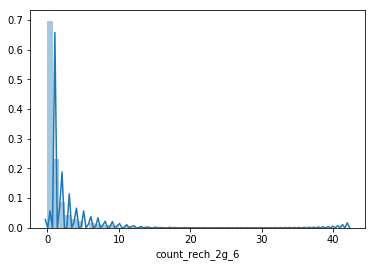

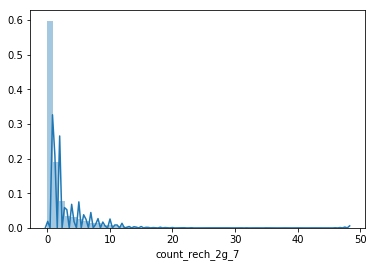

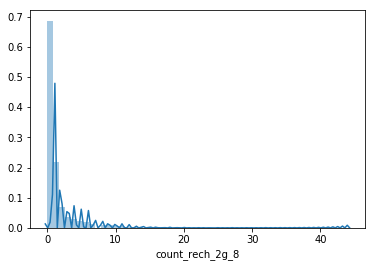

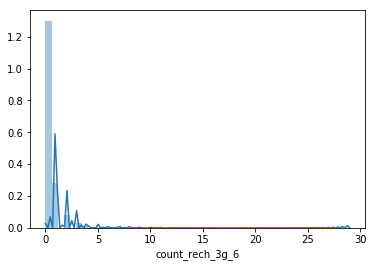

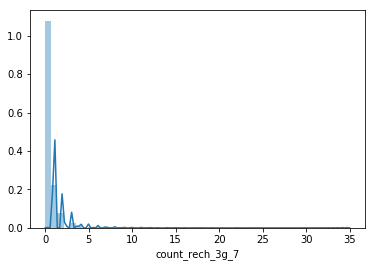

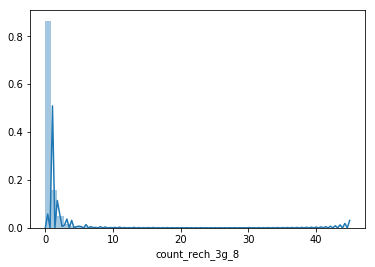

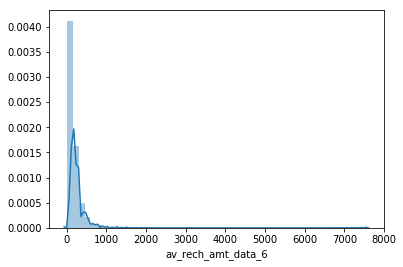

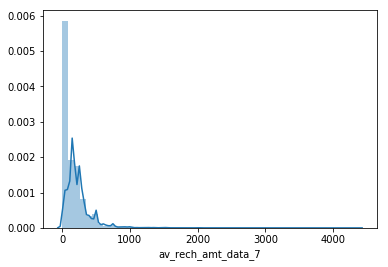

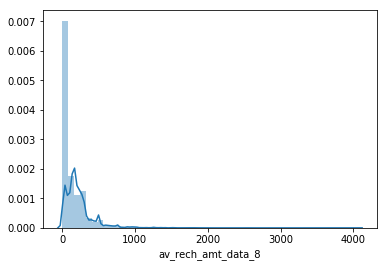

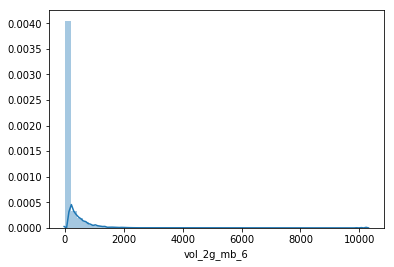

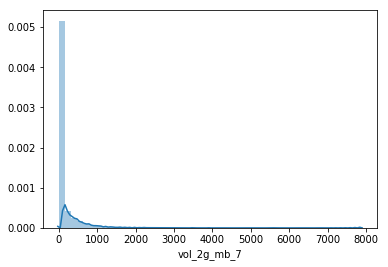

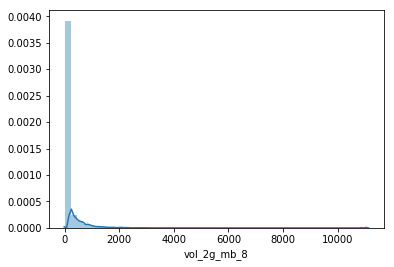

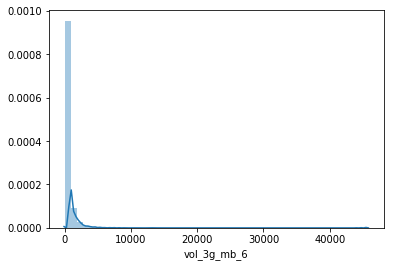

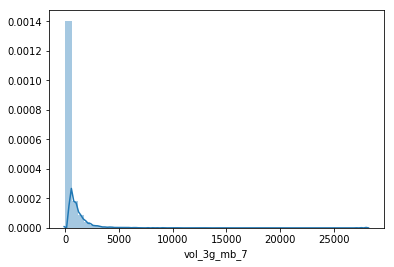

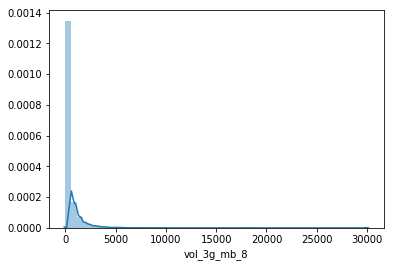

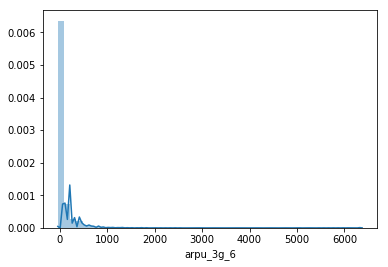

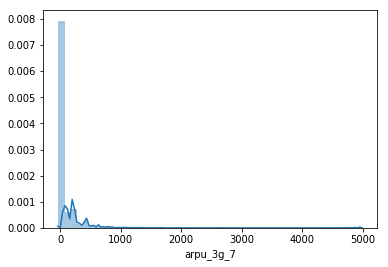

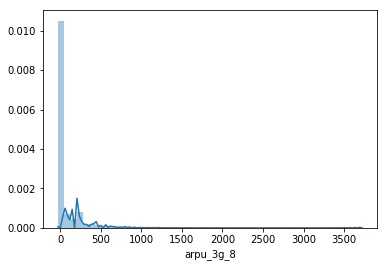

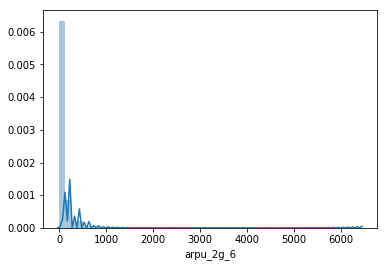

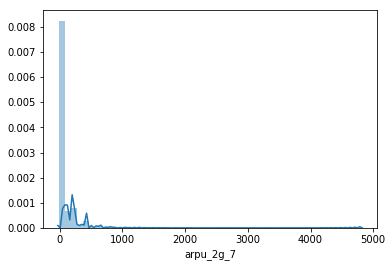

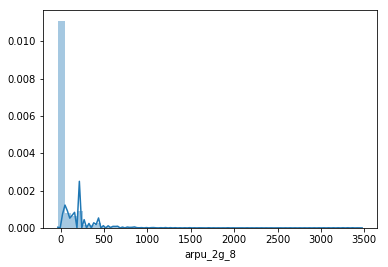

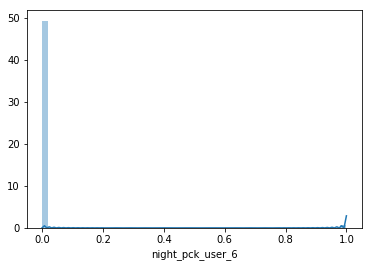

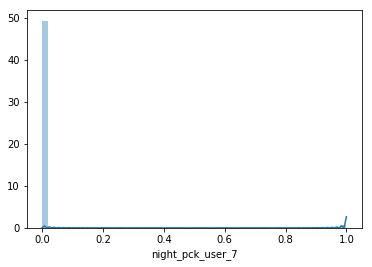

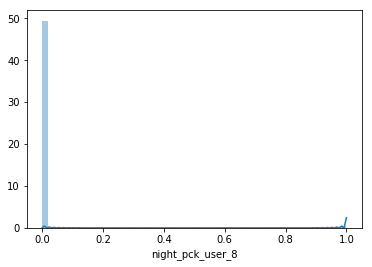

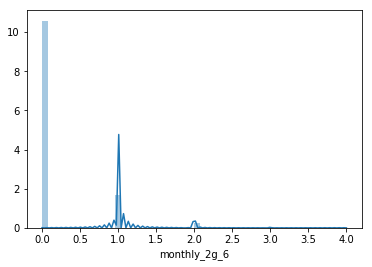

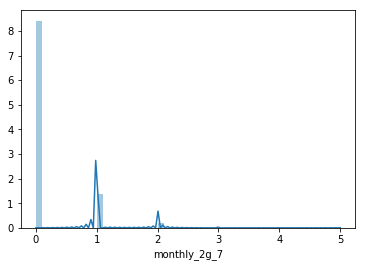

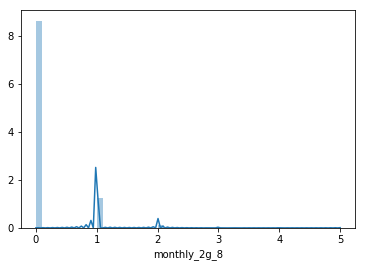

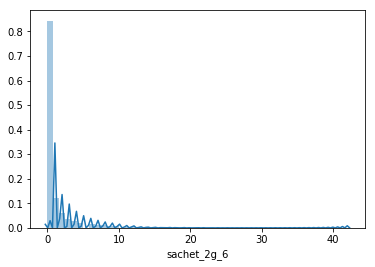

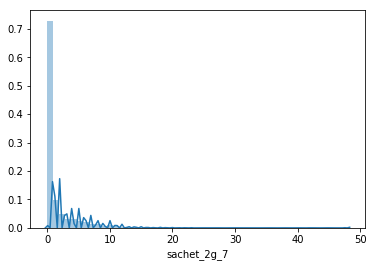

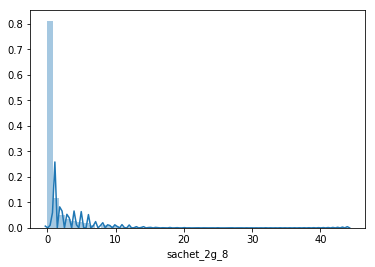

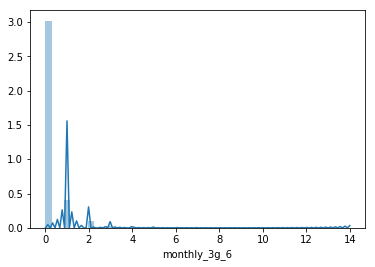

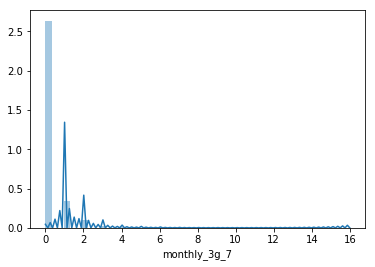

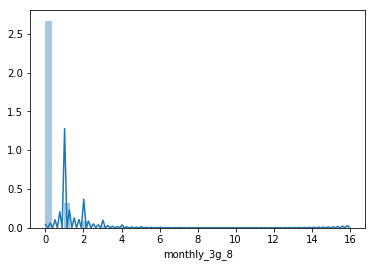

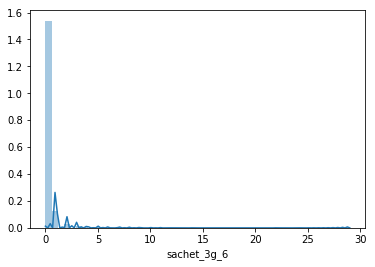

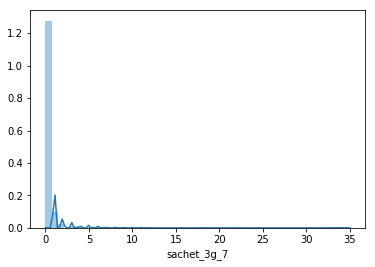

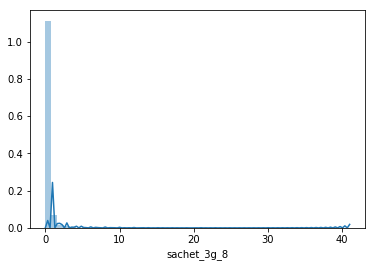

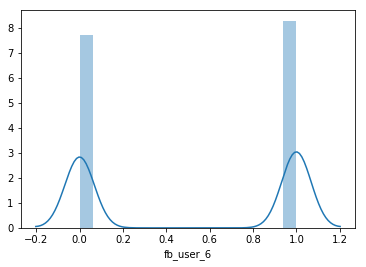

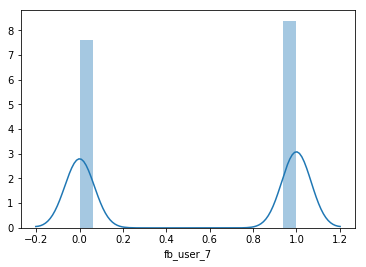

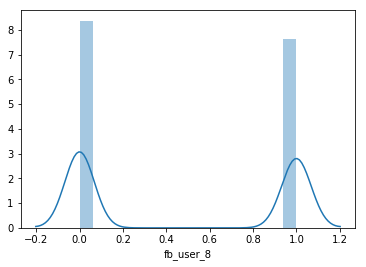

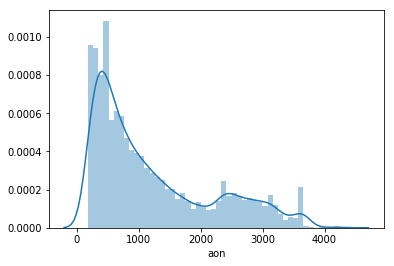

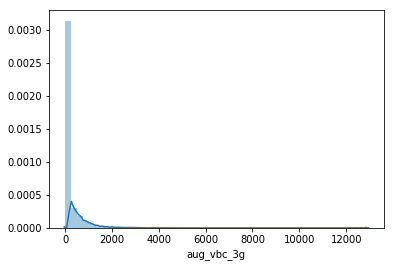

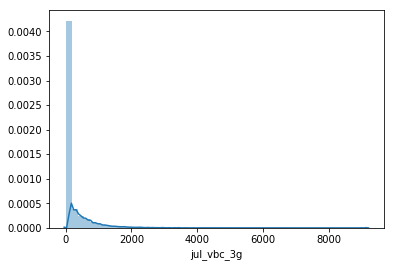

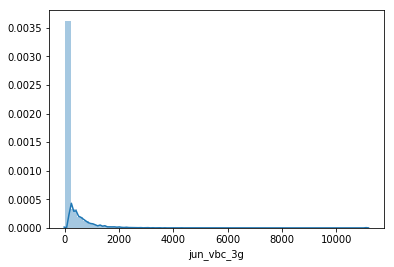

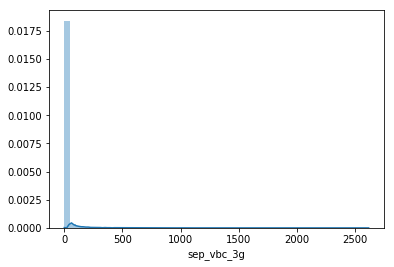

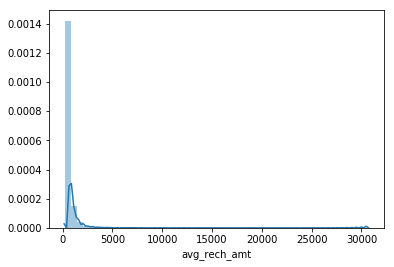

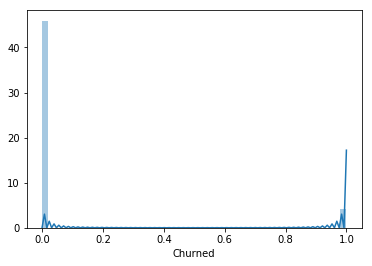

In [17]:
plt.figure()
for col in range(1, churn_data2.shape[1]):
    sns.distplot(churn_data2.iloc[:, col])
    plt.show()

### Step 3: Test-Train Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Putting feature variable to X
X = churn_data2.drop(['mobile_number','circle_id','Churned','avg_rech_amt'], axis=1)

X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,...,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,...,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00
21,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,...,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00
23,0.0,0.0,0.0,74.350,193.897,366.966,48.96,50.66,33.58,85.41,...,0,1,0.0,1.0,1.0,604,40.45,51.86,0.00,0.00


In [20]:
# correlation matrix
cor = X.corr()
cor

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,1.000000,0.671732,0.612617,0.342438,0.216136,0.186807,0.509280,...,-0.025233,-0.017509,-0.120360,-0.197733,-0.140312,0.041451,0.058547,0.055172,0.112462,0.045053
arpu_7,NaN,NaN,NaN,0.671732,1.000000,0.759858,0.211608,0.320818,0.270330,0.351713,...,0.010861,0.000907,-0.183840,-0.117152,-0.101672,0.031506,0.083801,0.102527,0.055324,0.059261
arpu_8,NaN,NaN,NaN,0.612617,0.759858,1.000000,0.151677,0.233728,0.347706,0.279066,...,-0.002160,0.045430,-0.130263,-0.102138,0.008288,0.070789,0.146710,0.085501,0.073855,0.104992
onnet_mou_6,NaN,NaN,NaN,0.342438,0.211608,0.151677,1.000000,0.750708,0.620316,0.090624,...,-0.046173,-0.045088,-0.266711,-0.279976,-0.236387,-0.044964,-0.105364,-0.111756,-0.101488,-0.033457
onnet_mou_7,NaN,NaN,NaN,0.216136,0.320818,0.233728,0.750708,1.000000,0.806053,0.054915,...,-0.050696,-0.040055,-0.275977,-0.270606,-0.222910,-0.052504,-0.102529,-0.108308,-0.107525,-0.032691
onnet_mou_8,NaN,NaN,NaN,0.186807,0.270330,0.347706,0.620316,0.806053,1.000000,0.063586,...,-0.037893,-0.031261,-0.240204,-0.232091,-0.176357,-0.026014,-0.078407,-0.088904,-0.084259,-0.026355
offnet_mou_6,NaN,NaN,NaN,0.509280,0.351713,0.279066,0.090624,0.054915,0.063586,1.000000,...,-0.075570,-0.059027,-0.286490,-0.302188,-0.253323,0.000342,-0.093834,-0.103264,-0.086085,-0.018725


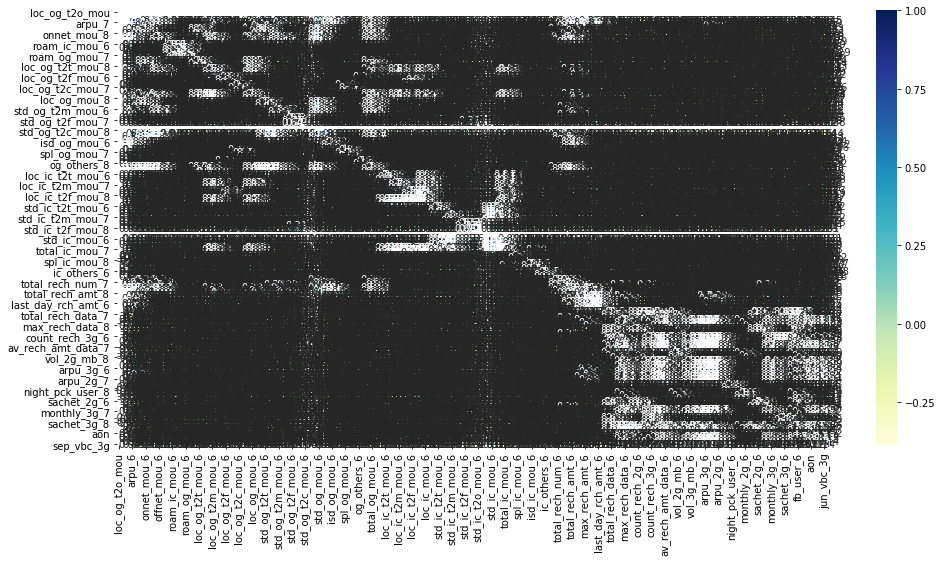

In [21]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [19]:
# Putting response variable to y
y = churn_data2['Churned']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churned, dtype: int32

In [20]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 4: Handling Class imbalance using SMOTE

In [21]:
#Class distribution before SMOTE
y_train.value_counts()

0    19309
1     1691
Name: Churned, dtype: int64

In [22]:
#Applying SMOTE on data
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [23]:
#converting in dtaframe and adding columns
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

In [24]:
#Class distribution after SMOTE
np.bincount(y_train)

array([19309, 19309], dtype=int64)

### Step 5: Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = X.columns
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,1.074649,0.800553,0.456827,-0.585961,-0.539487,-0.423317,-0.473346,...,-0.191896,-0.157616,-0.973683,-0.919319,-0.709576,3.024993,-0.318652,-0.356122,-0.361503,-0.113524
1,0.0,0.0,0.0,-0.158623,-0.487977,-0.024890,-0.305709,-0.454621,-0.333576,-0.160921,...,-0.191896,-0.157616,1.095126,1.161369,1.483679,1.518549,0.227003,0.042646,0.407700,-0.113524
2,0.0,0.0,0.0,-0.621477,-0.482428,-0.131815,-0.457834,-0.398977,-0.227074,-0.138512,...,-0.191896,-0.157616,1.095126,1.161369,-0.709576,2.606793,-0.318652,-0.356122,-0.361503,-0.113524
3,0.0,0.0,0.0,1.394957,-0.462004,0.694667,4.200666,-0.217749,1.309441,0.113791,...,-0.191896,-0.157616,-0.973683,-0.919319,-0.709576,0.498464,-0.318652,-0.356122,-0.361503,-0.113524
4,0.0,0.0,0.0,-0.321067,-0.173932,-0.235542,-0.561922,-0.462544,-0.375657,-0.408849,...,-0.191896,-0.157616,1.095126,1.161369,1.483679,-0.870506,0.460186,0.742840,-0.022286,-0.113524


### Step 6: Performing PCA

In [27]:
X_train.shape

(38618, 161)

In [28]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [29]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

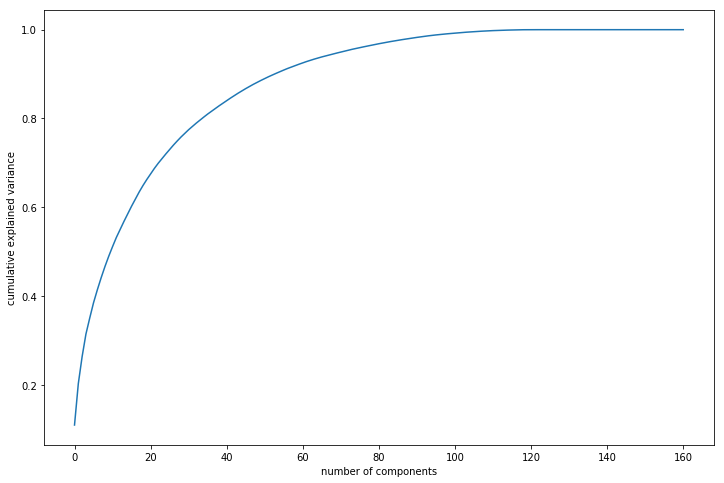

In [30]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

80 components can describe 95% of variance

In [31]:
#Using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [32]:
#Basis transformation - getting the data on PCs
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38618, 80)

In [33]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [34]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we can see that correlations are indeed very close to 0

max corr: 0.025592055552887783 , min corr:  -0.020448279089105695


### Step 7: Creating different models

#### 1. Creating Logistic Regression model using PCA applied trained data

In [35]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [36]:
#Making prediction on the train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]

In [37]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':pred_probs_train})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.364726
1,0,0.037072
2,0,0.295103
3,0,0.000016
4,0,0.059506


##### Finding Optimal Cutoff Point using train data

In [38]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.364726,1,1,1,1,0,0,0,0,0,0
1,0,0.037072,1,0,0,0,0,0,0,0,0,0
2,0,0.295103,1,1,1,0,0,0,0,0,0,0
3,0,0.000016,1,0,0,0,0,0,0,0,0,0
4,0,0.059506,1,0,0,0,0,0,0,0,0,0


In [39]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.714796  0.977938  0.451655
0.2   0.2  0.776400  0.958983  0.593816
0.3   0.3  0.811720  0.936040  0.687400
0.4   0.4  0.832462  0.904397  0.760526
0.5   0.5  0.840126  0.859185  0.821068
0.6   0.6  0.837796  0.804081  0.871511
0.7   0.7  0.826739  0.739500  0.913978
0.8   0.8  0.791885  0.638096  0.945673
0.9   0.9  0.643146  0.305091  0.981200


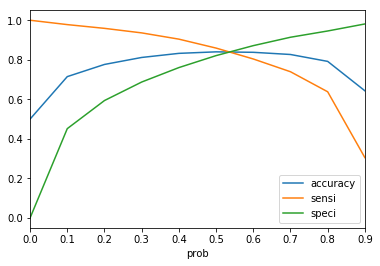

In [40]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.58 is the optimum point to take it as a cutoff probability. However, to predict the churners correctly specificity/recall must be high so we are using cutoff = 0.2

In [41]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.364726,1,1,1,1,0,0,0,0,0,0,1
1,0,0.037072,1,0,0,0,0,0,0,0,0,0,0
2,0,0.295103,1,1,1,0,0,0,0,0,0,0,1
3,0,0.000016,1,0,0,0,0,0,0,0,0,0,0
4,0,0.059506,1,0,0,0,0,0,0,0,0,0,0


In [42]:
#Checking Recall value and Gini coefficient for Training data
print("Recall value:","{:2.2}".format(metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)))
print("Gini value:","{:2.2}".format(2*(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))-1))

Recall value: 0.96
Gini value: 0.55


##### Making predictions on the test set using model created by Logistic Regression

In [43]:
#Scaling Test data
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [44]:
#Applying selected components to the test data - 80 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 80)

In [45]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [46]:
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':pred_probs_test})
y_test_pred_final.head()

,Churn,Churn_Prob
20296,1,0.715094
8279,1,0.467438
72269,0,0.018652
65602,0,0.329890
42758,1,0.899808


In [47]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [48]:
y_test_pred_final.head()

,Churn,Churn_Prob,final_predicted
20296,1,0.715094,1
8279,1,0.467438,1
72269,0,0.018652,0
65602,0,0.329890,1
42758,1,0.899808,1


In [49]:
#Checking Recall value and Gini coefficient for Test data
print("Recall value:","{:2.2}".format(metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)))
print("Gini value:","{:2.2}".format(2*(metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted))-1))

Recall value: 0.92
Gini value: 0.51


In [50]:
# confusion matrix
print(confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted))

[[4922 3329]
 [  63  687]]


#### 2. Creating Decision Tree model using PCA applied trained data

#####  Tuning hyperparameters

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

##### 1. Tuning max_depth

In [52]:
n_folds = 5
parameters = {'max_depth': range(1, 40)}
dtree1 = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fitting tree on training data
tree1 = GridSearchCV(dtree1, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree1.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [53]:
# scores of GridSearch CV
tree_scores1 = tree1.cv_results_
pd.DataFrame(tree_scores1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.303901,0.008562,0.001396,0.001739,1,{'max_depth': 1},0.677628,0.640860,0.613413,0.677628,...,0.647211,0.026310,39,0.683175,0.631061,0.619861,0.682786,0.622670,0.647911,0.028871
1,0.560400,0.006357,0.000000,0.000000,2,{'max_depth': 2},0.711807,0.679959,0.688244,0.721129,...,0.700192,0.015004,38,0.717809,0.676636,0.694569,0.721435,0.706564,0.703403,0.016353
2,0.807736,0.009254,0.002194,0.001828,3,{'max_depth': 3},0.754013,0.734852,0.712066,0.759192,...,0.738775,0.016752,36,0.768175,0.729462,0.711724,0.761313,0.737183,0.741571,0.020757
3,1.026684,0.015502,0.004716,0.005728,4,{'max_depth': 4},0.700673,0.700673,0.726567,0.705593,...,0.706510,0.010267,37,0.720658,0.696446,0.731469,0.704020,0.706111,0.711741,0.012601
4,1.250231,0.010413,0.003723,0.006062,5,{'max_depth': 5},0.758156,0.791818,0.797255,0.784568,...,0.783469,0.013462,35,0.774649,0.793682,0.803392,0.781640,0.788516,0.788376,0.009874


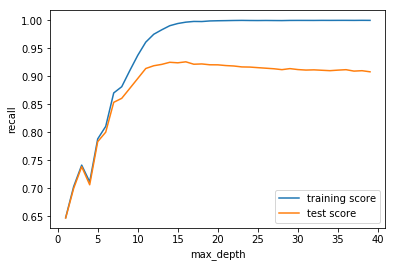

In [54]:
# plotting recall with max_depth
plt.figure()
plt.plot(tree_scores1["param_max_depth"], 
         tree_scores1["mean_train_score"], 
         label="training score")
plt.plot(tree_scores1["param_max_depth"], 
         tree_scores1["mean_test_score"], 
         label="test score")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

##### 2. Tuning min_samples_leaf

In [55]:
n_folds = 5
parameters = {'min_samples_leaf': range(100, 1500, 400)}
dtree2 = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fitting tree on training data
tree2 = GridSearchCV(dtree2, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree2.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [56]:
# scores of GridSearch CV
tree_scores2 = tree2.cv_results_
pd.DataFrame(tree_scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.110895,0.080893,0.001601,0.001960,100,{'min_samples_leaf': 100},0.809684,0.842310,0.839202,0.830399,...,0.826402,0.013914,1,0.834790,0.849226,0.859002,0.839645,0.828586,0.842250,0.010756
1,1.410428,0.019576,0.006249,0.007653,500,{'min_samples_leaf': 500},0.791300,0.762558,0.800104,0.777835,...,0.775856,0.019040,2,0.812326,0.762349,0.801580,0.771995,0.750129,0.779676,0.023571
2,1.193946,0.016304,0.007743,0.006586,900,{'min_samples_leaf': 900},0.755826,0.797514,0.768773,0.776282,...,0.768295,0.018490,3,0.776267,0.797695,0.772966,0.773548,0.743138,0.772723,0.017391
3,1.060679,0.010704,0.001207,0.001479,1300,{'min_samples_leaf': 1300},0.700673,0.780425,0.753237,0.768255,...,0.751774,0.027300,4,0.717291,0.776656,0.753933,0.768175,0.760098,0.755231,0.020452


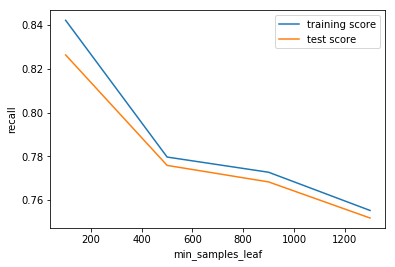

In [57]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(tree_scores2["param_min_samples_leaf"], 
         tree_scores2["mean_train_score"], 
         label="training score")
plt.plot(tree_scores2["param_min_samples_leaf"], 
         tree_scores2["mean_test_score"], 
         label="test score")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

##### 3. Tuning min_samples_split

In [58]:
n_folds = 5
parameters = {'min_samples_split': range(200, 500, 50)}
dtree3 = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fitting tree on training data
tree3 = GridSearchCV(dtree3, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree3.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
# scores of GridSearch CV
tree_scores3 = tree3.cv_results_
pd.DataFrame(tree_scores3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.475800,0.156237,0.001596,0.001954,200,{'min_samples_split': 200},0.821595,0.830787,0.832211,0.828068,...,0.828966,0.003981,1,0.867126,0.864602,0.868194,0.868162,0.865193,0.866655,0.001498
1,3.311069,0.075764,0.001801,0.001470,250,{'min_samples_split': 250},0.812791,0.825479,0.821854,0.819135,...,0.820136,0.004198,2,0.856477,0.854373,0.854761,0.853823,0.854415,0.854770,0.000905
2,3.246243,0.081973,0.006735,0.004859,300,{'min_samples_split': 300},0.812144,0.819524,0.816416,0.819782,...,0.817210,0.002800,3,0.850036,0.848482,0.842591,0.845731,0.851405,0.847649,0.003155
3,3.171284,0.080872,0.000000,0.000000,350,{'min_samples_split': 350},0.812144,0.819006,0.814474,0.818488,...,0.815552,0.002718,4,0.844760,0.846346,0.839678,0.841199,0.843993,0.843195,0.002423
4,3.119777,0.064665,0.000000,0.000000,400,{'min_samples_split': 400},0.808519,0.814474,0.813050,0.815510,...,0.812290,0.002671,5,0.838642,0.837250,0.836020,0.837153,0.840756,0.837964,0.001625


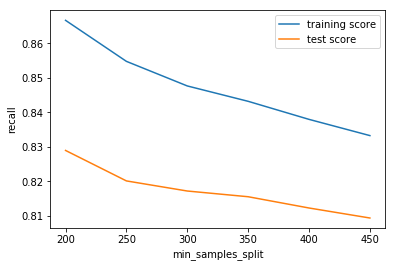

In [60]:
# plotting recall with min_samples_split
plt.figure()
plt.plot(tree_scores3["param_min_samples_split"], 
         tree_scores3["mean_train_score"], 
         label="training score")
plt.plot(tree_scores3["param_min_samples_split"], 
         tree_scores3["mean_test_score"], 
         label="test score")
plt.xlabel("min_samples_split")
plt.ylabel("recall")
plt.legend()
plt.show()

### Gridsearch to find optimal hyperparameters

In [61]:
# Creating the parameter grid 
param_grid = {
    'max_depth': range(10, 15, 2),
    'min_samples_leaf': range(100, 1500, 400),
    'min_samples_split': range(200, 500, 100)
}

n_folds = 5

# Instantiating the grid search model
dtree4 = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
tree_grid_search = GridSearchCV(estimator = dtree4, param_grid = param_grid, scoring = "recall",
                          cv = n_folds, verbose = 1)

# Fitting the grid search to the train data
tree_grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(10, 15, 2), 'min_samples_leaf': range(100, 1500, 400), 'min_samples_split': range(200, 500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [62]:
# cv results
tree_cv_results = pd.DataFrame(tree_grid_search.cv_results_)
tree_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.007452,0.042871,0.007232,0.007060,10,100,200,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.813568,0.827550,...,0.821223,0.006127,3,0.840034,0.832783,0.847090,0.833625,0.832211,0.837149,0.005710
1,1.889522,0.046500,0.001597,0.001956,10,100,300,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.802693,0.820559,...,0.808380,0.010356,6,0.827798,0.826698,0.808312,0.808765,0.836031,0.821521,0.011081
2,1.836542,0.026674,0.000798,0.001596,10,100,400,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.790005,0.803729,...,0.803097,0.008060,9,0.813168,0.806888,0.812779,0.814721,0.830658,0.815643,0.007966
3,1.436819,0.036929,0.001402,0.001748,10,500,200,"{'max_depth': 10, 'min_samples_leaf': 500, 'mi...",0.791300,0.762558,...,0.775856,0.019040,10,0.812326,0.762349,0.801580,0.771995,0.750129,0.779676,0.023571
4,1.420250,0.014734,0.007651,0.006641,10,500,300,"{'max_depth': 10, 'min_samples_leaf': 500, 'mi...",0.791300,0.762558,...,0.775856,0.019040,10,0.812326,0.762349,0.801580,0.771995,0.750129,0.779676,0.023571


In [63]:
# printing the optimal accuracy score and hyperparameters
print("Best recall score:", tree_grid_search.best_score_)
print(tree_grid_search.best_estimator_)

Best recall score: 0.8264021958672122
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


In [64]:
# Running the final Decision Tree model with best hyperparameters
dtclf_final = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=14, 
                                  min_samples_leaf=100,
                                  min_samples_split=200)
dtclf_final.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [65]:
# predicting on test data using above model and checking gini coefficient
y_test_predicted_dt = dtclf_final.predict(df_test_pca)
print("Recall value:","{:2.2}".format(metrics.recall_score(y_test, y_test_predicted_dt)))
print("Gini value:","{:2.2}".format(2*(metrics.roc_auc_score(y_test, y_test_predicted_dt))-1))

Recall value: 0.69
Gini value: 0.51


In [67]:
# confusion matrix
print(confusion_matrix(y_test, y_test_predicted_dt))

[[6766 1485]
 [ 234  516]]


#### 3. Creating Random Forest model using PCA applied trained data

#####  Tuning hyperparameters

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

##### 1. Tuning max_depth

In [69]:
n_folds = 5
parameters = {'max_depth': range(2, 20, 5)}
rf1 = RandomForestClassifier()

# fitting on training data
rf1 = GridSearchCV(rf1, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf1.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [70]:
# scores of GridSearch CV
scores1 = rf1.cv_results_
pd.DataFrame(scores1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.419624,0.027543,0.004993,0.004187,2,{'max_depth': 2},0.677369,0.762817,0.788193,0.732781,...,0.751204,0.042897,4,0.691591,0.755357,0.783000,0.733605,0.815640,0.755838,0.042276
1,1.122304,0.022807,0.008237,0.007033,7,{'max_depth': 7},0.838685,0.858364,0.859399,0.868980,...,0.853747,0.011146,3,0.866900,0.870525,0.868453,0.881466,0.866714,0.870812,0.005500
2,1.616345,0.015688,0.016005,0.002869,12,{'max_depth': 12},0.941222,0.937856,0.937079,0.942517,...,0.940598,0.002749,2,0.979802,0.979608,0.975270,0.981161,0.983428,0.979854,0.002667
3,1.902765,0.014394,0.015096,0.002658,17,{'max_depth': 17},0.951838,0.948990,0.945883,0.950803,...,0.950489,0.003005,1,0.998252,0.997669,0.997864,0.997605,0.998058,0.997890,0.000241


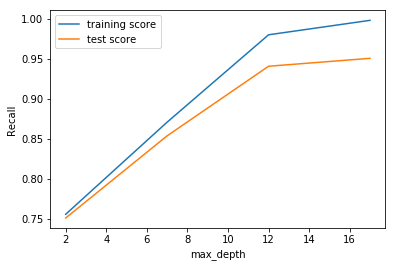

In [71]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores1["param_max_depth"], 
         scores1["mean_train_score"], 
         label="training score")
plt.plot(scores1["param_max_depth"], 
         scores1["mean_test_score"], 
         label="test score")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

We can see above that after max_depth 12, graph started to straighten up. Hence, we will be using max_depth = 12

##### 2. Tuning n_estimators

In [72]:
n_folds = 5
parameters = {'n_estimators': range(100, 1500, 400)}
rf2 = RandomForestClassifier(max_depth=12)

# fitting on training data
rf2 = GridSearchCV(rf2, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf2.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [73]:
# scores of GridSearch CV
scores2 = rf2.cv_results_
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.064882,0.177341,0.106497,0.010551,100,{'n_estimators': 100},0.953910,0.952097,0.951838,0.957535,...,0.953493,0.002153,4,0.991131,0.989318,0.989966,0.991131,0.988607,0.990031,0.000996
1,80.561721,1.726796,0.527240,0.009388,500,{'n_estimators': 500},0.955981,0.953651,0.951062,0.955981,...,0.954477,0.001918,3,0.990030,0.990225,0.990548,0.991066,0.989707,0.990315,0.000464
2,144.894581,3.515205,0.985335,0.018696,900,{'n_estimators': 900},0.957276,0.953910,0.952356,0.955463,...,0.955150,0.001817,1,0.990484,0.990613,0.990807,0.990807,0.989837,0.990510,0.000358
3,216.171607,5.108278,1.601797,0.129099,1300,{'n_estimators': 1300},0.955205,0.955722,0.951321,0.957017,...,0.954684,0.001917,2,0.990484,0.990678,0.990678,0.990160,0.989125,0.990225,0.000582


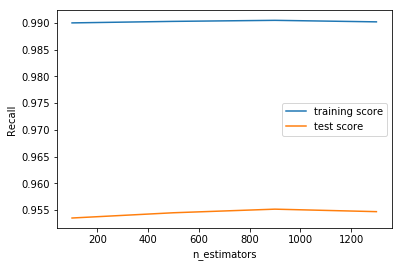

In [74]:
# plotting recall with n_estimators
plt.figure()
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_train_score"], 
         label="training score")
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_test_score"], 
         label="test score")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### 3. Tuning max_features

In [75]:
n_folds = 5
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=12)

# fitting on training data
rf3 = GridSearchCV(rf3, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf3.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [76]:
# scores of GridSearch CV
scores3 = rf3.cv_results_
pd.DataFrame(scores3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.899044,0.048130,0.014758,0.001103,4,{'max_features': 4},0.929311,0.933454,0.938892,0.927758,...,0.930499,0.005351,5,0.971516,0.973328,0.978119,0.972357,0.970870,0.973238,0.002576
1,1.727418,0.156542,0.018834,0.006319,8,{'max_features': 8},0.933454,0.942258,0.933195,0.940704,...,0.937490,0.003686,4,0.978313,0.983880,0.977989,0.979543,0.978185,0.979582,0.002217
2,3.170882,0.078551,0.013776,0.007068,14,{'max_features': 14},0.947695,0.944847,0.944847,0.946919,...,0.944534,0.003287,3,0.984657,0.986599,0.979996,0.984528,0.981486,0.983453,0.002380
3,4.192470,0.179430,0.015697,0.000735,20,{'max_features': 20},0.947954,0.943035,0.945365,0.950285,...,0.946502,0.002455,1,0.986081,0.983686,0.985369,0.986729,0.985564,0.985486,0.001016
4,5.360727,0.127984,0.016306,0.005418,24,{'max_features': 24},0.942517,0.945624,0.942517,0.947178,...,0.944637,0.001840,2,0.985628,0.982132,0.983621,0.982650,0.983558,0.983518,0.001195


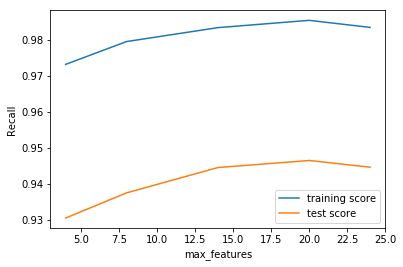

In [77]:
# plotting recall with max_features
plt.figure()
plt.plot(scores3["param_max_features"], 
         scores3["mean_train_score"], 
         label="training score")
plt.plot(scores3["param_max_features"], 
         scores3["mean_test_score"], 
         label="test score")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### 4. Tuning min_samples_leaf

In [78]:
n_folds = 5
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=12)

# fitting on training data
rf4 = GridSearchCV(rf4, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf4.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [79]:
# scores of GridSearch CV
scores4 = rf4.cv_results_
pd.DataFrame(scores4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.496970,0.095257,0.016316,0.003632,100,{'min_samples_leaf': 100},0.817452,0.837649,0.839202,0.830399,...,0.828940,0.008891,1,0.850586,0.842364,0.852463,0.845860,0.849625,0.848180,0.003617
1,1.430520,0.071020,0.014960,0.008544,150,{'min_samples_leaf': 150},0.788193,0.828845,0.827550,0.831176,...,0.816614,0.016588,2,0.824108,0.832654,0.834660,0.833948,0.820624,0.829199,0.005723
2,1.341955,0.127667,0.016936,0.002597,200,{'min_samples_leaf': 200},0.787157,0.822113,0.809425,0.799845,...,0.805220,0.011522,3,0.815045,0.818347,0.815951,0.809283,0.821142,0.815954,0.003949
3,1.285601,0.089349,0.014166,0.002158,250,{'min_samples_leaf': 250},0.790782,0.809166,0.808648,0.801398,...,0.799938,0.008390,4,0.812844,0.804622,0.807600,0.808895,0.798032,0.806399,0.004947
4,1.162372,0.093333,0.014005,0.004156,300,{'min_samples_leaf': 300},0.771880,0.795702,0.795702,0.787416,...,0.786162,0.009211,6,0.797890,0.790833,0.799443,0.793876,0.800557,0.796520,0.003634


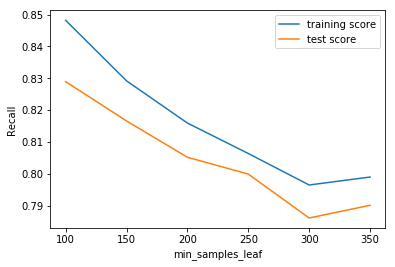

In [80]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores4["param_min_samples_leaf"], 
         scores4["mean_train_score"], 
         label="training score")
plt.plot(scores4["param_min_samples_leaf"], 
         scores4["mean_test_score"], 
         label="test score")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

##### 5. Tuning min_samples_split

In [81]:
n_folds = 5
parameters = {'min_samples_split': range(200, 500, 50)}
rf5 = RandomForestClassifier(max_depth=12)

# fitting on training data
rf5 = GridSearchCV(rf5, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf5.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [82]:
# scores of GridSearch CV
scores5 = rf5.cv_results_
pd.DataFrame(scores5).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.656759,0.119734,0.015019,0.001398,200,{'min_samples_split': 200},0.827550,0.867426,0.852667,0.854480,...,0.850588,0.012914,1,0.877452,0.878811,0.872791,0.869230,0.875777,0.874812,0.003439
1,1.600543,0.140321,0.015954,0.002233,250,{'min_samples_split': 250},0.823149,0.850854,0.840756,0.836613,...,0.838366,0.008952,2,0.863728,0.856801,0.857319,0.859649,0.863154,0.860130,0.002874
2,1.541111,0.098877,0.013315,0.001364,300,{'min_samples_split': 300},0.809943,0.845935,0.835836,0.835577,...,0.831374,0.011934,3,0.849680,0.856348,0.844695,0.849744,0.852602,0.850614,0.003834
3,1.560829,0.145653,0.012584,0.005643,350,{'min_samples_split': 350},0.798550,0.848265,0.832211,0.827809,...,0.823761,0.017106,4,0.840034,0.853370,0.844501,0.834596,0.830010,0.840502,0.008084
4,1.739746,0.312322,0.014729,0.003103,400,{'min_samples_split': 400},0.805282,0.838944,0.821077,0.823666,...,0.818945,0.012550,5,0.841717,0.840811,0.829935,0.835567,0.827809,0.835168,0.005593


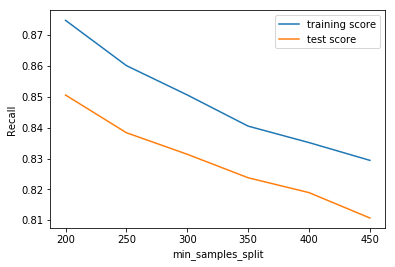

In [83]:
# plotting recall with min_samples_split
plt.figure()
plt.plot(scores5["param_min_samples_split"], 
         scores5["mean_train_score"], 
         label="training score")
plt.plot(scores5["param_min_samples_split"], 
         scores5["mean_test_score"], 
         label="test score")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Gridsearch to find optimal hyperparameters

In [84]:
# Creating the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [25,50,75,100], 
    'max_features': [5,10,15]
}
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="recall",
                          cv = 3, n_jobs = -1,verbose = 1)

In [85]:
# Fitting the grid search to the train data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 23.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [8, 10, 12], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [25, 50, 75, 100], 'max_features': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [86]:
# printing the Recall value for training data and hyperparameters
print("Recall:", grid_search.best_score_)
print(grid_search.best_estimator_)

Recall: 0.8424568853902326
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [90]:
# running final model with the best hyperparameters

rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=100)
rfc_final.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
# predicting on test data using above model and checking Recall value and gini coefficient
y_test_predicted_rf = rfc_final.predict(df_test_pca)
print("Recall value:","{:2.2}".format(metrics.recall_score(y_test, y_test_predicted_rf)))
print("Gini value:","{:2.2}".format(2*(metrics.roc_auc_score(y_test, y_test_predicted_rf))-1))

Recall value: 0.76
Gini value: 0.62


In [92]:
# confusion matrix
print(confusion_matrix(y_test, y_test_predicted_rf))

[[7148 1103]
 [ 183  567]]


After creating Plain vanilla Logistic Regression, Decision Tree & Random Forest models using the Principal Components, we can see that Recall value is highest for Logistic Regression model i.e. more no. of churners are correctly identified.  

### Now using Lasso Regression, we have created Logistic Regression as it will help in feature selection and there is no impact of multi collinearity on it. 

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [94]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
folds = 5
lasso = Lasso()

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [95]:
lasso_results = pd.DataFrame(model_lasso.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.094844,0.217555,0.003124,0.006249,0.0001,{'alpha': 0.0001},-0.368146,-0.367843,-0.321549,-0.366781,...,-0.358679,0.018580,1,-0.285919,-0.286573,-0.298298,-0.309402,-0.308267,-0.297692,0.010115
1,2.359061,0.557767,0.000000,0.000000,0.001,{'alpha': 0.001},-0.369560,-0.368353,-0.322717,-0.370044,...,-0.360634,0.019007,2,-0.286919,-0.287691,-0.299706,-0.311174,-0.310081,-0.299114,0.010443
2,0.253066,0.028635,0.006249,0.007653,0.01,{'alpha': 0.01},-0.382309,-0.383468,-0.334304,-0.394183,...,-0.378197,0.022672,3,-0.299168,-0.299909,-0.313180,-0.323581,-0.322719,-0.311711,0.010591
3,0.174951,0.006251,0.006248,0.007653,0.05,{'alpha': 0.05},-0.437082,-0.437856,-0.383710,-0.473720,...,-0.441502,0.033296,4,-0.352309,-0.351175,-0.365107,-0.367361,-0.366294,-0.360450,0.007154
4,0.161114,0.006626,0.006250,0.007655,0.1,{'alpha': 0.1},-0.493678,-0.493229,-0.428846,-0.538726,...,-0.498682,0.040388,5,-0.400785,-0.400535,-0.412656,-0.406431,-0.405602,-0.405202,0.004439


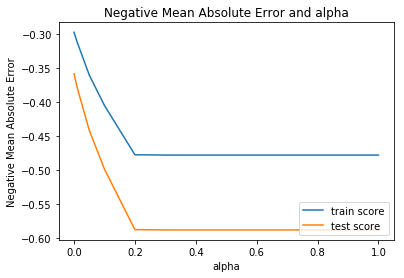

In [96]:
# plotting mean test and train scores with alpha 
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [97]:
print(model_lasso.best_params_)
print(model_lasso.best_score_)

{'alpha': 0.0001}
-0.3586787053813851


In [98]:
#Doing the fit for alpha=0.0001
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lr = lasso.fit(X_train, y_train)
lr.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.76410564e-02,
        3.58396361e-02, -3.83481076e-02, -1.80378073e-02,  2.36967567e-02,
       -5.26506311e-02,  6.24148489e-04, -0.00000000e+00, -4.98641566e-02,
        6.15470380e-03,  6.60442421e-03,  1.35933361e-03, -1.20211191e-02,
        3.22399493e-02,  3.20596091e-02,  0.00000000e+00,  5.57605856e-03,
       -0.00000000e+00, -5.88584444e-04, -6.70149535e-03, -1.60907666e-02,
       -5.38197914e-03, -2.39196820e-03, -4.17156965e-03, -1.50798184e-02,
       -6.62678211e-03,  8.56270432e-03, -0.00000000e+00, -0.00000000e+00,
       -9.66039396e-03,  2.24035845e-02,  0.00000000e+00,  4.82971311e-03,
        0.00000000e+00,  3.66150000e-02, -1.12495789e-02,  6.55715601e-03,
       -7.85349906e-05, -1.33878176e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.77940570e-03,  0.00000000e+00,
        3.43788359e-03, -2.70776410e-03,  0.00000000e+00,  1.30589014e-02,
        9.76629838e-03, -

In [99]:
# Finding the predicted value for Train Data
y_train_predicted_ls = lr.predict(X_train)

In [100]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final_ls = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_predicted_ls})
y_train_pred_final_ls.head()

,Churn,Churn_Prob
0,0,0.514794
1,0,0.093423
2,0,0.431309
3,0,0.033968
4,0,0.266284


##### Finding optimal cutoff point

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_ls[i]= y_train_pred_final_ls.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_ls.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.514794,1,1,1,1,1,1,0,0,0,0
1,0,0.093423,1,0,0,0,0,0,0,0,0,0
2,0,0.431309,1,1,1,1,1,0,0,0,0,0
3,0,0.033968,1,0,0,0,0,0,0,0,0,0
4,0,0.266284,1,1,1,0,0,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_ls_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm2 = metrics.confusion_matrix(y_train_pred_final_ls.Churn, y_train_pred_final_ls[i] )
    total2=sum(sum(cm2))
    accuracy = (cm2[0,0]+cm2[1,1])/total2
    
    speci = cm2[0,0]/(cm2[0,0]+cm2[0,1])
    sensi = cm2[1,1]/(cm2[1,0]+cm2[1,1])
    cutoff_ls_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_ls_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.570692  0.996530  0.144855
0.1   0.1  0.617743  0.992439  0.243047
0.2   0.2  0.677767  0.984204  0.371329
0.3   0.3  0.742866  0.963851  0.521881
0.4   0.4  0.800818  0.925786  0.675851
0.5   0.5  0.829121  0.855767  0.802476
0.6   0.6  0.823787  0.760474  0.887099
0.7   0.7  0.790486  0.643275  0.937697
0.8   0.8  0.691387  0.410223  0.972552
0.9   0.9  0.574499  0.157440  0.991558


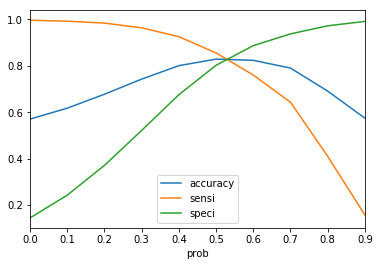

In [103]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_ls_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.57 is the optimum point to take it as a cutoff probability. However, to predict the churners correctly specificity/recall must be high so we are using cutoff = 0.2

In [104]:
y_train_pred_final_ls['final_predicted'] = y_train_pred_final_ls.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final_ls.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.514794,1,1,1,1,1,1,0,0,0,0,1
1,0,0.093423,1,0,0,0,0,0,0,0,0,0,0
2,0,0.431309,1,1,1,1,1,0,0,0,0,0,1
3,0,0.033968,1,0,0,0,0,0,0,0,0,0,0
4,0,0.266284,1,1,1,0,0,0,0,0,0,0,1


In [105]:
#Checking Recall value and Gini coefficient for Training data
print("Recall value:","{:2.2}".format(metrics.recall_score(y_train_pred_final_ls.Churn, y_train_pred_final_ls.final_predicted)))
print("Gini value:","{:2.2}".format(2*(metrics.roc_auc_score(y_train_pred_final_ls.Churn, y_train_pred_final_ls.final_predicted))-1))

Recall value: 0.98
Gini value: 0.36


##### Making predictions on the test set using model created by Logistic Regression

In [106]:
#Making prediction on the test data
y_test_predicted_ls = lr.predict(X_test)

In [107]:
y_test_pred_final_ls = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predicted_ls})
y_test_pred_final_ls.head()

,Churn,Churn_Prob
20296,1,0.632131
8279,1,0.455680
72269,0,0.234244
65602,0,0.403395
42758,1,0.806824


In [108]:
y_test_pred_final_ls['final_predicted'] = y_test_pred_final_ls.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_test_pred_final_ls.head()

,Churn,Churn_Prob,final_predicted
20296,1,0.632131,1
8279,1,0.455680,1
72269,0,0.234244,1
65602,0,0.403395,1
42758,1,0.806824,1


In [109]:
#Checking Recall value and Gini coefficient for Test data
print("Recall value:","{:2.2}".format(metrics.recall_score(y_test_pred_final_ls.Churn, y_test_pred_final_ls.final_predicted)))
print("Gini value:","{:2.2}".format(2*(metrics.roc_auc_score(y_test_pred_final_ls.Churn, y_test_pred_final_ls.final_predicted))-1))

Recall value: 0.96
Gini value: 0.33


In [110]:
# confusion matrix
print(confusion_matrix(y_test_pred_final_ls.Churn, y_test_pred_final_ls.final_predicted))

[[3030 5221]
 [  28  722]]


We have used Lasso Regression above and we are getting high recall value. Now lets identify the variables that have high contribution in our model using the coefficients of lasso regression.

In [111]:
#creating dataframe having coefficients corresonding to the variables

col_df = pd.DataFrame({'Variable':X_train.columns, 'Coefficient':lr.coef_})

In [112]:
#Checking best 5 features
col_df.sort_values(by='Coefficient', ascending = False).head()

,Variable,Coefficient
135,arpu_2g_6,0.040945
100,total_rech_num_7,0.037733
37,std_og_t2m_mou_7,0.036615
4,arpu_7,0.035840
16,roam_og_mou_7,0.032240


### Final Recommendations
-->> 'std_og_t2m_mou_7' has the highest coefficient value and this variable signifies the outgoing std minutes to other network.

-->> The other variable having high coefficient is 'roam_og_mou_7' which is the outgoing minutes on roaming. From this we can infer that, we should provide customized std or roaming plans to customers who frequently do std calls to other networks and ones who do outgoing calls on roaming.  

-->> 'arpu_2g_6', 'arpu_7' are average revenue per user features. Referring these, if average revenue of customer is less we can target the customers by offering them low cost plans.